In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

## Data Loading and Preprocessing

In [38]:
dataset = pd.read_csv('dataset2.csv')
dataset = dataset.drop(columns = ['PeopleId'])
dataset.head(5)

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle temperature (°C),ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,30.3125,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,30.3125,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,30.3125,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,30.3125,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,30.3125,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694


In [39]:
# count of null values in the dataset
print(f"Count of Null Values: \n\n{dataset.isna().sum()}")

Count of Null Values: 

activityID                    0
heart_rate                   46
hand temperature (°C)         0
hand acceleration X ±16g      0
hand acceleration Y ±16g      0
hand acceleration Z ±16g      0
hand gyroscope X              0
hand gyroscope Y              0
hand gyroscope Z              0
hand magnetometer X           0
hand magnetometer Y           0
hand magnetometer Z           0
chest temperature (°C)        0
chest acceleration X ±16g     0
chest acceleration Y ±16g     0
chest acceleration Z ±16g     0
chest gyroscope X             0
chest gyroscope Y             0
chest gyroscope Z             0
chest magnetometer X          0
chest magnetometer Y          0
chest magnetometer Z          0
ankle temperature (°C)        0
ankle acceleration X ±16g     0
ankle acceleration Y ±16g     0
ankle acceleration Z ±16g     0
ankle gyroscope X             0
ankle gyroscope Y             0
ankle gyroscope Z             0
ankle magnetometer X          0
ankle magnetomet

In [40]:
# imputing null values with mean value of the feature
heartRate_meanVal = np.mean(dataset['heart_rate'])
dataset['heart_rate'].fillna(value = heartRate_meanVal, inplace = True)

print(f"Count of Null Values after Imputation: \n\n{dataset.isna().sum()}")

Count of Null Values after Imputation: 

activityID                   0
heart_rate                   0
hand temperature (°C)        0
hand acceleration X ±16g     0
hand acceleration Y ±16g     0
hand acceleration Z ±16g     0
hand gyroscope X             0
hand gyroscope Y             0
hand gyroscope Z             0
hand magnetometer X          0
hand magnetometer Y          0
hand magnetometer Z          0
chest temperature (°C)       0
chest acceleration X ±16g    0
chest acceleration Y ±16g    0
chest acceleration Z ±16g    0
chest gyroscope X            0
chest gyroscope Y            0
chest gyroscope Z            0
chest magnetometer X         0
chest magnetometer Y         0
chest magnetometer Z         0
ankle temperature (°C)       0
ankle acceleration X ±16g    0
ankle acceleration Y ±16g    0
ankle acceleration Z ±16g    0
ankle gyroscope X            0
ankle gyroscope Y            0
ankle gyroscope Z            0
ankle magnetometer X         0
ankle magnetometer Y         

## Exploratory Data Analysis

<BarContainer object of 13 artists>

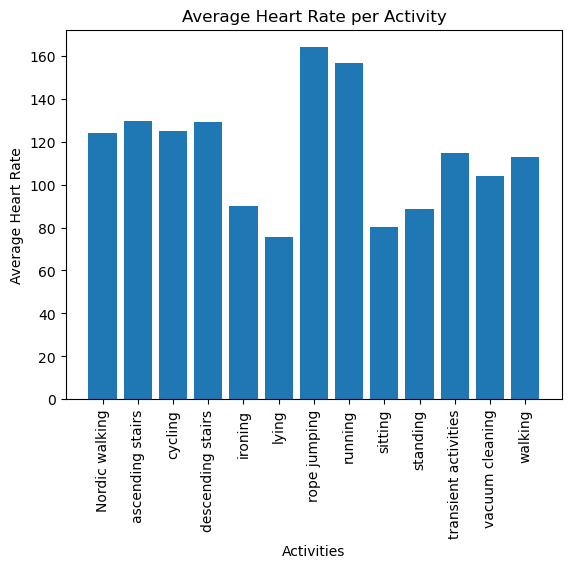

In [61]:
# average heart rate for each activity
activities = np.unique(dataset['activityID'])

activityHeartRate = {f: 0 for f in np.unique(dataset['activityID'])}
for activity in activities:
    heartRate = []
    idxs = np.where(dataset['activityID'] == activity)[0]
    for idx in idxs:
        heartRate.append(dataset.iloc[idx]['heart_rate'])
    activityHeartRate[activity] = np.mean(heartRate)

lists = sorted(activityHeartRate.items())
x, y = zip(*lists)

plt.title('Average Heart Rate per Activity')
plt.xlabel('Activities')
plt.ylabel('Average Heart Rate')
plt.xticks(rotation = 'vertical')
plt.bar(x, y)

<BarContainer object of 13 artists>

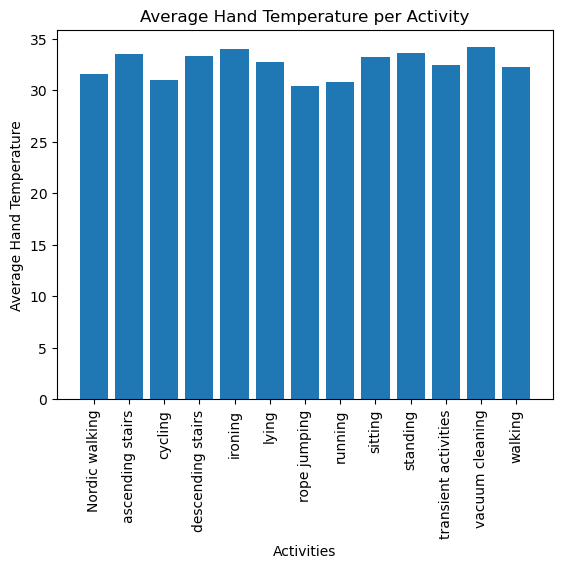

In [67]:
# average hand temperature per activity
activities = np.unique(dataset['activityID'])

activityHandTemp = {f: 0 for f in np.unique(dataset['activityID'])}
for activity in activities:
    heartRate = []
    idxs = np.where(dataset['activityID'] == activity)[0]
    for idx in idxs:
        heartRate.append(dataset.iloc[idx]['hand temperature (°C)'])
    activityHandTemp[activity] = np.mean(heartRate)

lists = sorted(activityHandTemp.items())
x, y = zip(*lists)

plt.title('Average Hand Temperature per Activity')
plt.xlabel('Activities')
plt.ylabel('Average Hand Temperature')
plt.xticks(rotation = 'vertical')
plt.bar(x, y)

<BarContainer object of 13 artists>

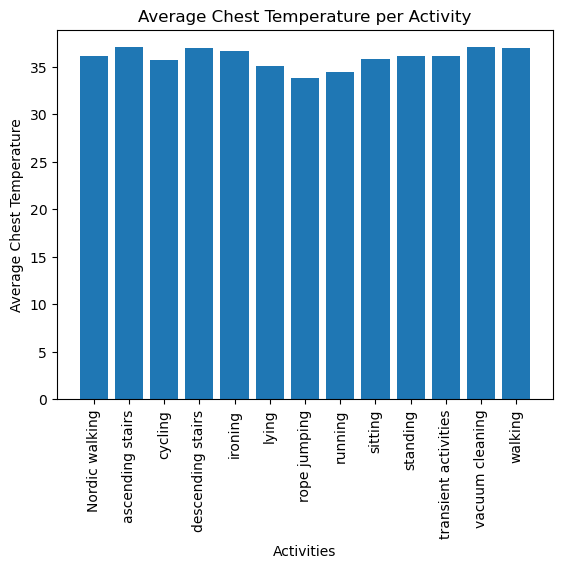

In [68]:
# average chest temperature per activity
activities = np.unique(dataset['activityID'])

activityChestTemp = {f: 0 for f in np.unique(dataset['activityID'])}
for activity in activities:
    heartRate = []
    idxs = np.where(dataset['activityID'] == activity)[0]
    for idx in idxs:
        heartRate.append(dataset.iloc[idx]['chest temperature (°C)'])
    activityChestTemp[activity] = np.mean(heartRate)

lists = sorted(activityChestTemp.items())
x, y = zip(*lists)

plt.title('Average Chest Temperature per Activity')
plt.xlabel('Activities')
plt.ylabel('Average Chest Temperature')
plt.xticks(rotation = 'vertical')
plt.bar(x, y)

<BarContainer object of 13 artists>

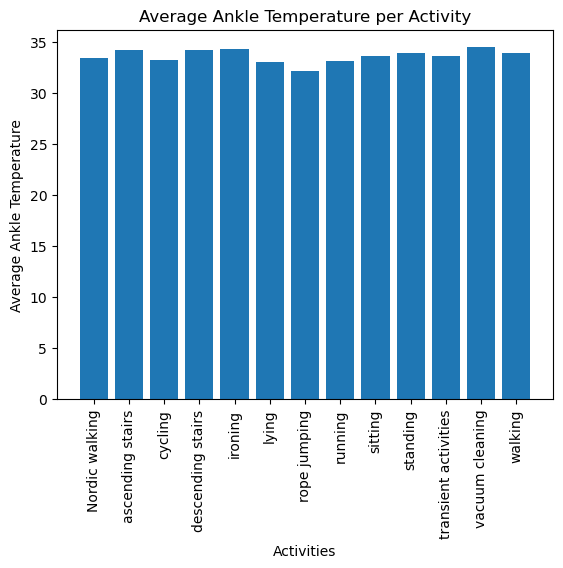

In [66]:
# average ankle temperature per activity
activities = np.unique(dataset['activityID'])

activityHeartRate = {f: 0 for f in np.unique(dataset['activityID'])}
for activity in activities:
    heartRate = []
    idxs = np.where(dataset['activityID'] == activity)[0]
    for idx in idxs:
        heartRate.append(dataset.iloc[idx]['ankle temperature (°C)'])
    activityHeartRate[activity] = np.mean(heartRate)

lists = sorted(activityHeartRate.items())
x, y = zip(*lists)

plt.title('Average Ankle Temperature per Activity')
plt.xlabel('Activities')
plt.ylabel('Average Ankle Temperature')
plt.xticks(rotation = 'vertical')
plt.bar(x, y)

## Data Preparation

In [70]:
target = dataset['activityID']
features = dataset.drop(columns = ['activityID'])

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, shuffle = True)

In [81]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Model Training

### Logistic Regression

In [84]:
logisticReg = LogisticRegression(solver = 'saga', max_iter = 500)
logisticReg.fit(X_train, y_train)

/Users/prasad/anaconda3/envs/stevens/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [90]:
yPred_logisticReg = logisticReg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, yPred_logisticReg)}")

Logistic Regression Accuracy: 0.6711806589078606
